In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('../glfharris.mplstyle')

In [2]:
# Defines the infusion rate / min across models
def inf_rate(x):
    if x <= 5:
        return 0.5
    else:
        return 0

# Default volumes
V1 = 5
V2 = 10
V3 = 20

# Default rate elimination constants
k10 = 0.3
k12 = 0.1
k13 = 0.05
k21 = 0.05
k31 = 0.025

# Default duration
duration = 30 # minutes
t = np.linspace(0, duration, duration*60)

# Single Compartment Model

<center>
<img src="img/single-compartment.svg">
</center>


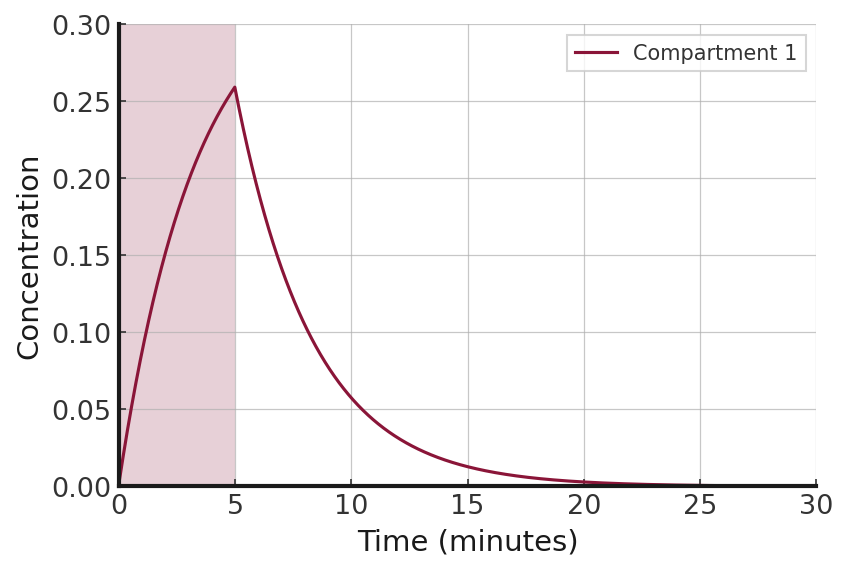

In [3]:
C1 = 0.0

C1_results = []

for x in t:
    dC1dt = - (k10 * C1 * V1) / (V1 * 60)
    
    C1 += dC1dt + inf_rate(x) / (V1 * 60)
    
    C1_results.append(C1)
    
results = {}
results["One"] = {"C1": C1_results}
    
plt.plot(t, C1_results, label='Compartment 1')
plt.fill_between(t, 0.3, where=[x for x in t < 5],alpha=0.2)
plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylabel('Concentration')
plt.ylim([0,0.3])
plt.legend()
plt.savefig('plots/one-cm.png', transparent=True)
plt.show()

# Two Compartment Model

<center>
<img src="img/two-compartment.svg">
</center>

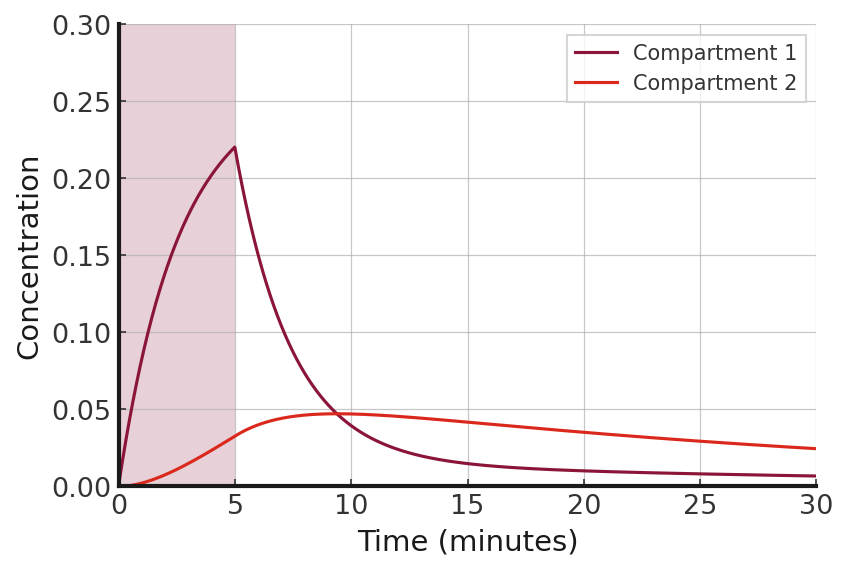

In [4]:
C1 = 0.0
C2 = 0.0

C1_results = []
C2_results = []

for x in t:   
    
    dC1dt = (k21*C2*V2 - (k10 * C1 * V1 + k12*C1*V1)) / (V1 * 60)
    dC2dt = (k12*C1*V1 - k21*C2*V2) / (V2 * 60)
    
    dC1dt += inf_rate(x) / (60 * V1)
    
    C1 += dC1dt
    C2 += dC2dt
    
    C1_results.append(C1)
    C2_results.append(C2)
    
results["Two"] = {"C1": C1_results,
                  "C2": C2_results,}
    
plt.plot(t, C1_results, label='Compartment 1')
plt.plot(t, C2_results, label='Compartment 2')
plt.fill_between(t, 0.3, where=[x for x in t < 5],alpha=0.2)
plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylabel('Concentration')
plt.ylim([0,0.3])
plt.legend()
plt.savefig('plots/two-cm.png', transparent=True)
plt.show()

# Three Compartment Model

<center>
<img src="img/three-compartment.svg">
</center>

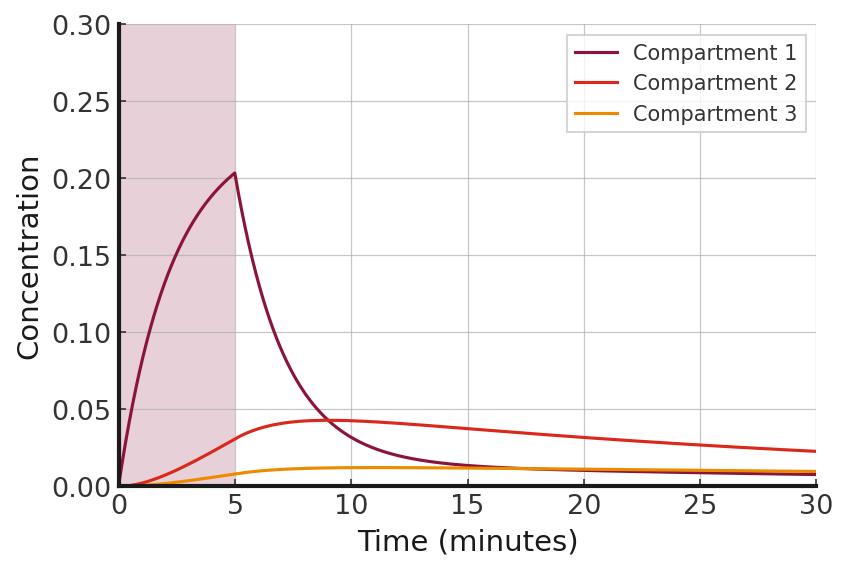

In [5]:
C1 = 0.0
C2 = 0.0
C3 = 0.0

C1_results = []
C2_results = []
C3_results = []

for x in t:
    
    dC1dt = ((k21*C2*V2 + k31*C3*V3) - (k10*C1*V1 + k12*C1*V1 + k13*C1*V1 )) / V1
    dC2dt = (k12*C1*V1 - k21*C2*V2) / V2
    dC3dt = (k13*C1*V1 - k31*C3*V3) / V3

    C1 += (dC1dt + (inf_rate(x) / V1)) / 60
    C2 += (dC2dt / 60)
    C3 += (dC3dt / 60)
    
    C1_results.append(C1)
    C2_results.append(C2)
    C3_results.append(C3)
    
results["Three"] = {"C1": C1_results,
                    "C2": C2_results,
                    "C3": C3_results,}

plt.plot(t, C1_results, label='Compartment 1')
plt.plot(t, C2_results, label='Compartment 2')
plt.plot(t, C3_results, label='Compartment 3')

plt.fill_between(t, 0.3, where=[x for x in t < 5],alpha=0.2)

plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylabel('Concentration')
plt.ylim([0,0.3])
plt.legend()
plt.savefig('plots/three-cm.png', transparent=True)
plt.show()

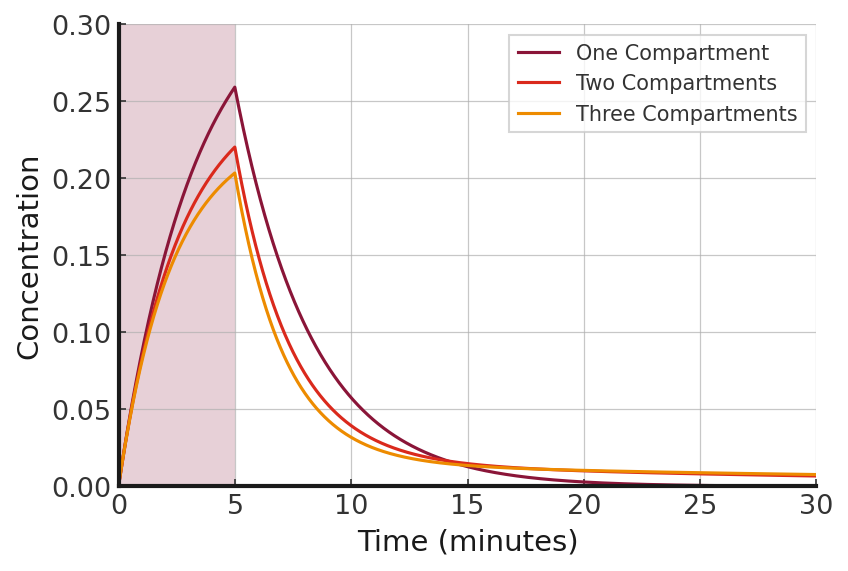

In [6]:
plt.plot(t, results["One"]["C1"], label='One Compartment')
plt.plot(t, results["Two"]["C1"], label='Two Compartments')
plt.plot(t, results["Three"]["C1"], label='Three Compartments')

plt.fill_between(t, 0.3, where=[x for x in t < 5],alpha=0.2)

plt.xlabel('Time (minutes)')
plt.xlim([0,duration])
plt.ylabel('Concentration')
plt.ylim([0,0.3])
plt.legend()
plt.show()

# Variation in Constants

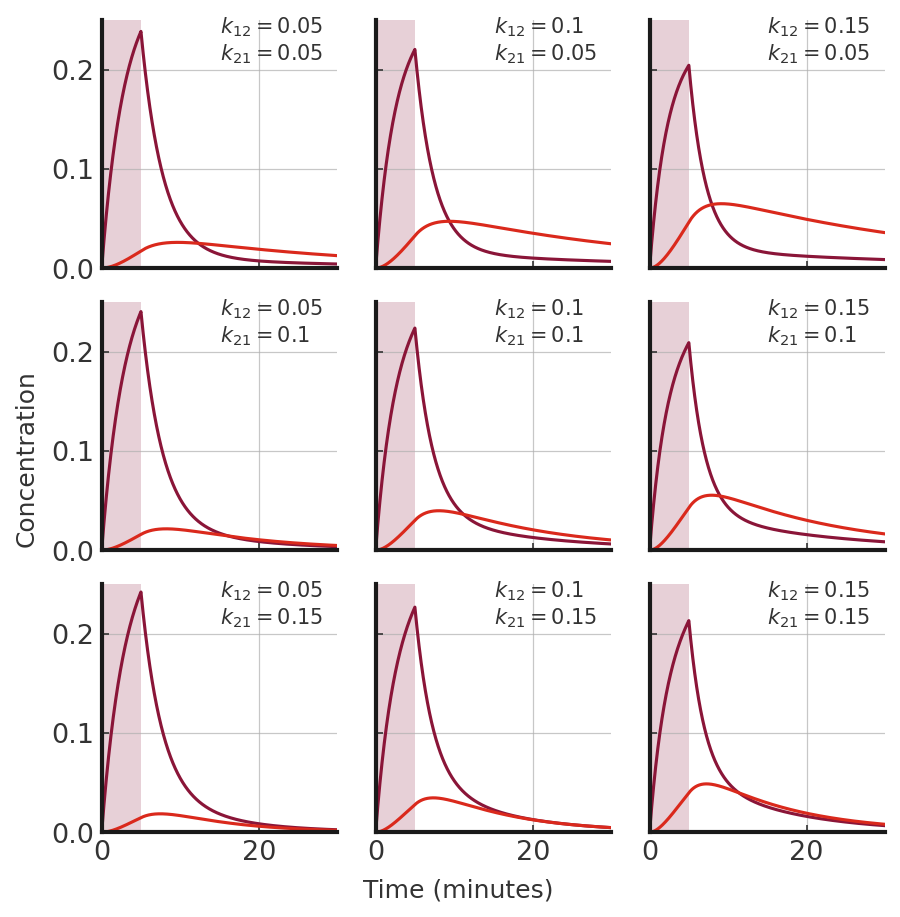

In [7]:
fig, axes = plt.subplots(3,3,figsize=(6,6),
                       sharex=True,sharey=True,
                       constrained_layout=True)

for i in range(1,10):
    
    ax = plt.subplot(3,3,i)
    
    if i in [1,4,7]:
        k12 = 0.05
    elif i in [2,5,8]:
        k12 = 0.1
    elif i in [3, 6, 9]:
        k12 = 0.15
        
    if i in [1,2,3]:
        k21 = 0.05
    elif i in [4,5,6]:
        k21 = 0.1
    elif i in [7,8,9]:
        k21 = 0.15

    C1 = 0.0
    C2 = 0.0

    C1_results = []
    C2_results = []

    for x in t:    
        dC1dt = (k21*C2*V2 - (k10 * C1 * V1 + k12*C1*V1)) / (V1 * 60)
        dC2dt = (k12*C1*V1 - k21*C2*V2) / (V2 * 60)

        dC1dt += inf_rate(x) / (60 * V1)

        C1 += dC1dt
        C2 += dC2dt

        C1_results.append(C1)
        C2_results.append(C2)

    ax.plot(t, C1_results)
    ax.plot(t, C2_results)
    ax.set_xlim([0,30])
    ax.set_ylim([0,0.25])
    
    
    ax.fill_between(t, 0.3, where=[x for x in t < 5],alpha=0.2)
    ax.annotate("$k_{12}=%s$\n$k_{21}=%s$" % (k12, k21) ,(15,0.21))
    
fig.supxlabel("Time (minutes)")
fig.supylabel("Concentration")

fig.savefig('plots/two-cm-variation.png',transparent=True)
plt.show()